In [2]:
import pandas as pd
import numpy as npacc

In [31]:
reject = pd.read_csv("rejected_2007_to_2018Q4.csv")

In [13]:
reject.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [3]:
accept = pd.read_csv("accepted_2007_to_2018Q4.csv")

c:\users\lenovo 330s\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
missing = accept.isna()
missing.head()

In [14]:
missing.dtypes

id                                            bool
member_id                                     bool
loan_amnt                                     bool
funded_amnt                                   bool
funded_amnt_inv                               bool
term                                          bool
int_rate                                      bool
installment                                   bool
grade                                         bool
sub_grade                                     bool
emp_title                                     bool
emp_length                                    bool
home_ownership                                bool
annual_inc                                    bool
verification_status                           bool
issue_d                                       bool
loan_status                                   bool
pymnt_plan                                    bool
url                                           bool
desc                           

In [26]:
missing_values_sum = missing.count

In [16]:
len(accept)

2260701

In [27]:
missing_values_sum/len(accept)

TypeError: unsupported operand type(s) for /: 'method' and 'int'

In [24]:
missing.mean().round(4)*100

id                                              0.00
member_id                                     100.00
loan_amnt                                       0.00
funded_amnt                                     0.00
funded_amnt_inv                                 0.00
term                                            0.00
int_rate                                        0.00
installment                                     0.00
grade                                           0.00
sub_grade                                       0.00
emp_title                                       7.39
emp_length                                      6.50
home_ownership                                  0.00
annual_inc                                      0.00
verification_status                             0.00
issue_d                                         0.00
loan_status                                     0.00
pymnt_plan                                      0.00
url                                           

In [8]:
dropcols = ['member_id','desc']
accept = accept.drop(dropcols,axis = 1)

In [9]:
pd.set_option("display.max_columns", None)
accept


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.00,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.00,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:

accept = accept.drop_duplicates(keep = 'first')

In [10]:
accept.shape

(2260701, 149)

In [11]:
accept.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.477304e+00,2.036667e

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
accept.head()

NameError: name 'accept' is not defined

In [5]:
accept.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
1,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
2,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
3,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
4,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
2260697,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2260698,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,True,True
2260699,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [4]:
desc_df = accept[['desc']]
pd.options.mode.chained_assignment = None


In [5]:
desc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   desc    object
dtypes: object(1)
memory usage: 17.2+ MB


In [6]:
desc_df.dropna(inplace=True)


In [7]:
desc_df['desc'].head()


1480     We knew that using our credit cards to finance...
33065    I had a bad year two years ago, with some late...
37860    Lenders,  I have the ability to pay off my cur...
50494     I paid off my first Prosper loan, but had an ...
61258                                                     
Name: desc, dtype: object

In [8]:
desc_df.to_csv('description.csv', index=False)


In [10]:
null_values = accept.isnull().sum()
for key,value in null_values.iteritems():
    print(key, "," ,value)


id , 0
member_id , 2260701
loan_amnt , 33
funded_amnt , 33
funded_amnt_inv , 33
term , 33
int_rate , 33
installment , 33
grade , 33
sub_grade , 33
emp_title , 167002
emp_length , 146940
home_ownership , 33
annual_inc , 37
verification_status , 33
issue_d , 33
loan_status , 33
pymnt_plan , 33
url , 33
desc , 2134634
purpose , 33
title , 23358
zip_code , 34
addr_state , 33
dti , 1744
delinq_2yrs , 62
earliest_cr_line , 62
fico_range_low , 33
fico_range_high , 33
inq_last_6mths , 63
mths_since_last_delinq , 1158535
mths_since_last_record , 1901545
open_acc , 62
pub_rec , 62
revol_bal , 33
revol_util , 1835
total_acc , 62
initial_list_status , 33
out_prncp , 33
out_prncp_inv , 33
total_pymnt , 33
total_pymnt_inv , 33
total_rec_prncp , 33
total_rec_int , 33
total_rec_late_fee , 33
recoveries , 33
collection_recovery_fee , 33
last_pymnt_d , 2460
last_pymnt_amnt , 33
next_pymnt_d , 1345343
last_credit_pull_d , 105
last_fico_range_high , 33
last_fico_range_low , 33
collections_12_mths_ex_med ,

In [12]:
accept.drop(['member_id'], axis = 1,inplace = True)


In [13]:
accept.columns


Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=150)

In [14]:
accept['loan_status'].unique()


array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [15]:
accept['loan_status'].value_counts(dropna=False)


Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

In [17]:
accept = accept.loc[accept['loan_status'].isin(['Fully Paid', 'Charged Off'])]


In [18]:
accept.shape


(1345310, 150)

In [19]:
accept.describe().T


,count,mean,std,min,25%,50%,75%,max
loan_amnt,1345310.0,14419.972014,8717.050787,500.00,8000.0000,12000.00,20000.0000,40000.00
funded_amnt,1345310.0,14411.556630,8713.117909,500.00,8000.0000,12000.00,20000.0000,40000.00
funded_amnt_inv,1345310.0,14389.141598,8715.493989,0.00,7875.0000,12000.00,20000.0000,40000.00
int_rate,1345310.0,13.239619,4.768716,5.31,9.7500,12.74,15.9900,30.99
installment,1345310.0,438.075533,261.512604,4.93,248.4800,375.43,580.7300,1719.83
...,...,...,...,...,...,...,...,...
hardship_payoff_balance_amount,5754.0,10995.141594,7474.257379,55.73,5037.3075,9305.10,15302.3600,39542.45
hardship_last_payment_amount,5754.0,184.689314,196.459790,0.01,39.5700,120.97,267.6050,1407.86
settlement_amount,33276.0,5029.933417,3684.827275,44.21,2228.6175,4174.68,6884.2375,33601.00
settlement_percentage,33276.0,47.691708,7.306107,0.20,45.0000,45.00,50.0000,521.35


In [20]:
null_data = accept.isnull().sum().sort_values(ascending= False)
drop_columns = list(null_data[null_data > accept.shape[0] *0.25].index) 
accept = accept.drop(drop_columns, axis = 1)


In [21]:
null_data = accept.isnull().sum(axis = 0)
null_data[null_data > 0]


emp_title                      85785
emp_length                     78511
title                          16659
zip_code                           1
dti                              374
inq_last_6mths                     1
revol_util                       857
last_pymnt_d                    2313
last_credit_pull_d                55
collections_12_mths_ex_med        56
tot_coll_amt                   67527
tot_cur_bal                    67527
total_rev_hi_lim               67527
acc_open_past_24mths           47281
avg_cur_bal                    67549
bc_open_to_buy                 61143
bc_util                        61912
chargeoff_within_12_mths          56
mo_sin_old_il_acct            105575
mo_sin_old_rev_tl_op           67528
mo_sin_rcnt_rev_tl_op          67528
mo_sin_rcnt_tl                 67527
mort_acc                       47281
mths_since_recent_bc           60221
mths_since_recent_inq         174071
num_accts_ever_120_pd          67527
num_actv_bc_tl                 67527
n

In [22]:
accept.drop(columns=null_data[null_data > 0].index,axis=0,inplace = True)


In [23]:
accept.isnull().sum(axis = 0)


id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
addr_state                 0
delinq_2yrs                0
earliest_cr_line           0
fico_range_low             0
fico_range_high            0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries    

In [24]:
accept['grade'].unique()


array(['C', 'B', 'F', 'A', 'E', 'D', 'G'], dtype=object)

In [25]:
accept["grade"].value_counts()


B    392741
C    381686
A    235090
D    200953
E     93650
F     32058
G      9132
Name: grade, dtype: int64

In [26]:
accept['sub_grade'].unique()


array(['C4', 'C1', 'B4', 'F1', 'C3', 'B2', 'B1', 'A2', 'B5', 'C2', 'E2',
       'A4', 'E3', 'C5', 'A1', 'D4', 'F3', 'D1', 'B3', 'D3', 'D5', 'A5',
       'F2', 'E4', 'D2', 'E1', 'F5', 'E5', 'A3', 'G2', 'G1', 'G3', 'G4',
       'F4', 'G5'], dtype=object)

In [27]:
accept['int_rate'].unique()


array([13.99, 11.99, 10.78, 22.45, 13.44,  9.17,  8.49,  6.49, 11.48,
       12.88, 19.48,  7.49, 19.89, 14.85,  5.32, 17.97, 24.24, 15.77,
        9.8 , 17.27, 18.49,  7.91, 23.13, 20.5 , 16.59, 18.99, 26.06,
       21.48,  6.99, 27.49, 26.99, 27.99, 28.49,  6.  , 25.09, 28.99,
       16.55,  7.89, 12.59, 13.67, 10.64,  7.26, 17.86, 14.48, 13.18,
        6.24,  8.38, 15.41,  9.76, 21.99, 16.99, 25.99, 17.57, 18.2 ,
       22.99,  6.89, 11.22, 19.99, 27.31, 20.99, 27.88, 23.99, 24.99,
       26.77, 12.05,  8.18,  9.99, 11.49, 10.99, 14.33, 16.9 , 11.53,
       18.55, 14.65, 13.33, 12.69, 18.25, 19.19, 12.29, 15.61, 25.78,
       19.52, 24.5 ,  6.39,  5.93,  6.92,  6.68, 21.67, 20.49, 25.8 ,
       18.84, 25.57, 25.83, 25.89,  8.67, 14.99, 17.14,  8.19, 10.49,
       11.44,  6.03, 12.39, 15.59,  9.49, 13.66, 14.31, 12.99, 15.99,
       16.49, 19.24, 18.54,  7.34, 11.98, 21.85, 20.39,  9.43,  5.31,
        6.07, 14.07, 15.04, 18.45, 10.9 , 13.58, 17.47, 16.01,  7.96,
       23.87, 30.65,

In [28]:
accept["int_rate"].value_counts()


10.99    37654
11.99    33110
13.99    29359
5.32     28819
9.17     26048
         ...  
17.44        1
18.72        1
17.54        1
22.64        1
16.71        1
Name: int_rate, Length: 654, dtype: int64

In [29]:
accept.shape


(1345310, 46)

In [30]:
accept.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 46 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1345310 non-null  object 
 1   loan_amnt                1345310 non-null  float64
 2   funded_amnt              1345310 non-null  float64
 3   funded_amnt_inv          1345310 non-null  float64
 4   term                     1345310 non-null  object 
 5   int_rate                 1345310 non-null  float64
 6   installment              1345310 non-null  float64
 7   grade                    1345310 non-null  object 
 8   sub_grade                1345310 non-null  object 
 9   home_ownership           1345310 non-null  object 
 10  annual_inc               1345310 non-null  float64
 11  verification_status      1345310 non-null  object 
 12  issue_d                  1345310 non-null  object 
 13  loan_status              1345310 non-null 

In [32]:
reject.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [33]:
reject['Loan Title'].value_counts(dropna=False)


Debt consolidation                        6418016
debt_consolidation                        5895211
Other                                     2656222
Credit card refinancing                   2298199
other                                     2042528
                                           ...   
affordable monthy payment                       1
Piano Purchase for Music School                 1
Purchasing Inventory for Gold Business          1
Consolidate debt/kids medical bills             1
PERSONNAL LOAN                                  1
Name: Loan Title, Length: 73929, dtype: int64

In [34]:
reject.shape


(27648741, 9)

In [35]:
reject.isnull().sum(axis=0)


Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

In [36]:
reject['Risk_Score'].fillna((reject['Risk_Score'].mean()), inplace=True)


In [37]:
reject.isnull().sum(axis=0)


Amount Requested             0
Application Date             0
Loan Title                1303
Risk_Score                   0
Debt-To-Income Ratio         0
Zip Code                   293
State                       22
Employment Length       951355
Policy Code                918
dtype: int64

In [38]:
reject.info(verbose=True, null_counts=True)


C:\Users\LENOVO 330S\AppData\Local\Temp/ipykernel_23052/3731509468.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  reject.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   Amount Requested      27648741 non-null  float64
 1   Application Date      27648741 non-null  object 
 2   Loan Title            27647438 non-null  object 
 3   Risk_Score            27648741 non-null  float64
 4   Debt-To-Income Ratio  27648741 non-null  object 
 5   Zip Code              27648448 non-null  object 
 6   State                 27648719 non-null  object 
 7   Employment Length     26697386 non-null  object 
 8   Policy Code           27647823 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [39]:
cateogry_columns=reject.select_dtypes(include=['object']).columns.tolist()
integer_columns=reject.select_dtypes(include=['int64','float64']).columns.tolist()

for column in reject:
    if reject[column].isnull().any():
        if(column in cateogry_columns):
            reject[column]=reject[column].fillna(reject[column].mode()[0])
        else:
            reject[column]=reject[column].fillna(reject[column].mean)


In [40]:
reject.isnull().sum(axis =0)


Amount Requested        0
Application Date        0
Loan Title              0
Risk_Score              0
Debt-To-Income Ratio    0
Zip Code                0
State                   0
Employment Length       0
Policy Code             0
dtype: int64

In [41]:
combined_dataset = accept.join(reject)


In [42]:
combined_dataset.shape


(1345310, 55)

In [43]:
loan = combined_dataset['loan_status'].value_counts()


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


c:\users\lenovo 330s\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


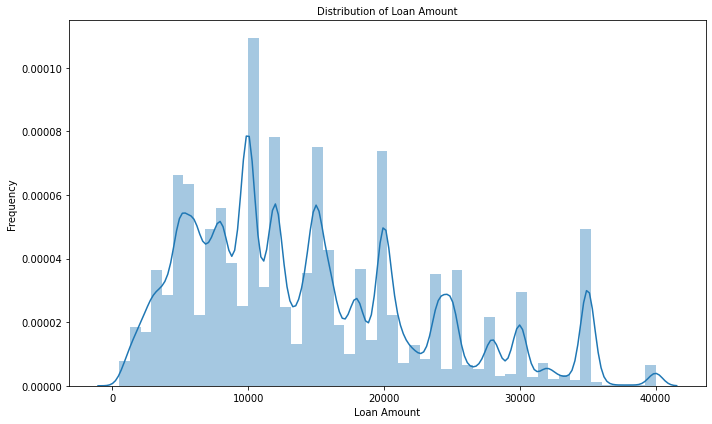

In [51]:
sns.distplot(accept['loan_amnt'])
plt.gcf().set_size_inches(10,6)
plt.title('Distribution of Loan Amount', fontsize = 10)
plt.xlabel('Loan Amount', fontsize = 10)
plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()


Text(0.5, 0, 'Count')

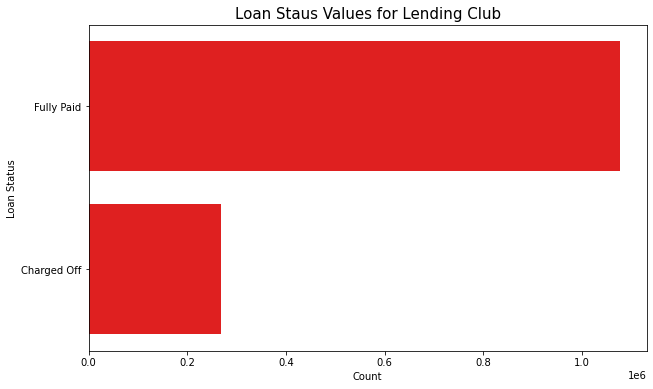

In [52]:
plt.figure(figsize=(10,6))

sns.barplot(y = loan.index, x = loan,color = 'red')
plt.title('Loan Staus Values for Lending Club',fontsize=15)
plt.ylabel('Loan Status', fontsize=10)
plt.xlabel('Count',fontsize=10)


In [53]:
gr = combined_dataset['grade'].value_counts()


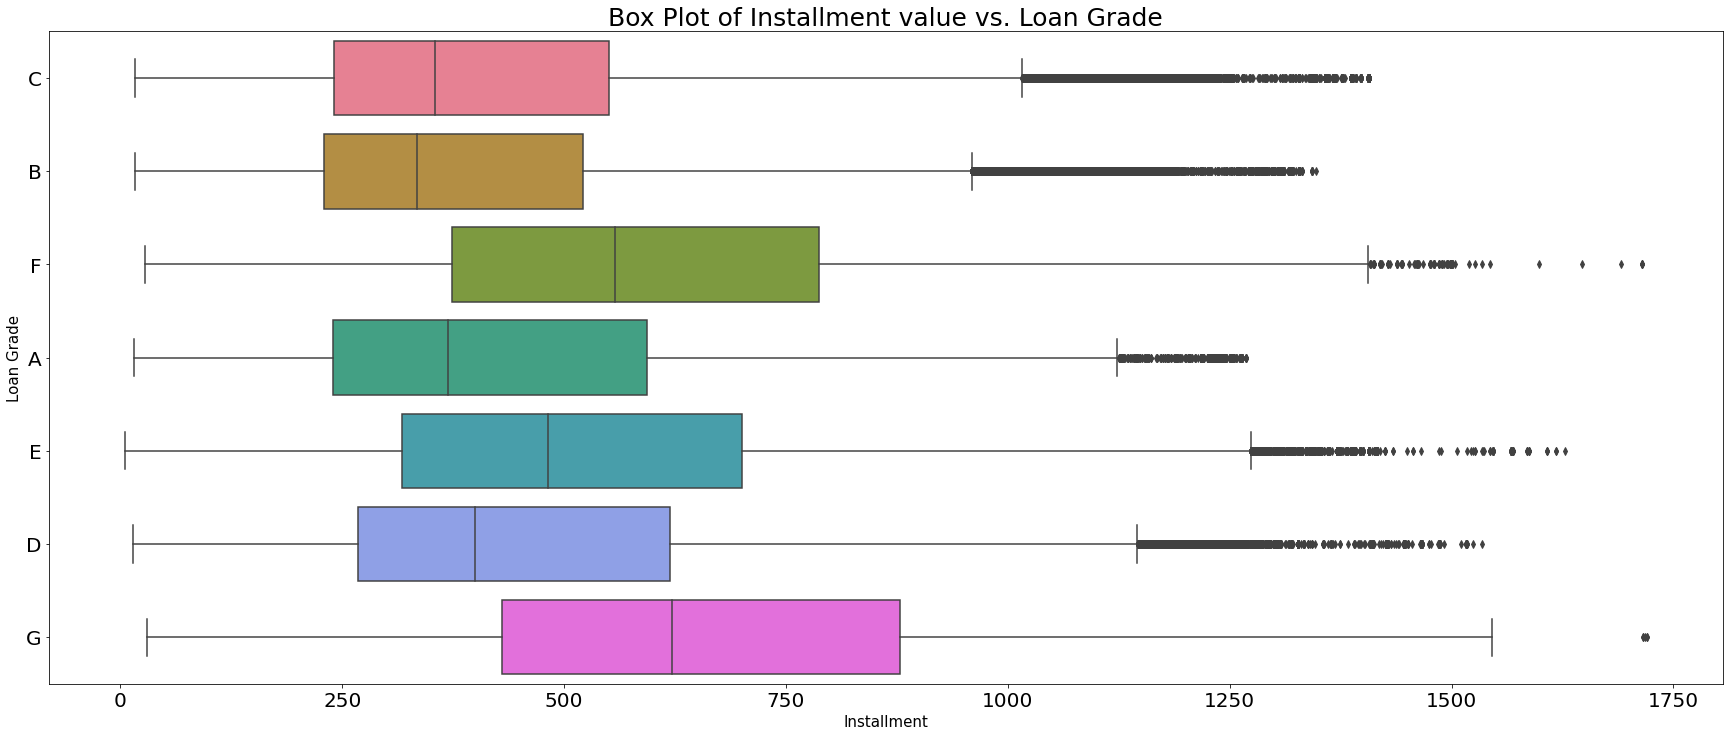

In [54]:
plt.figure(figsize=(30,12))
sns.boxplot(x="installment", y="grade", data=combined_dataset, palette="husl")
plt.title('Box Plot of Installment value vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


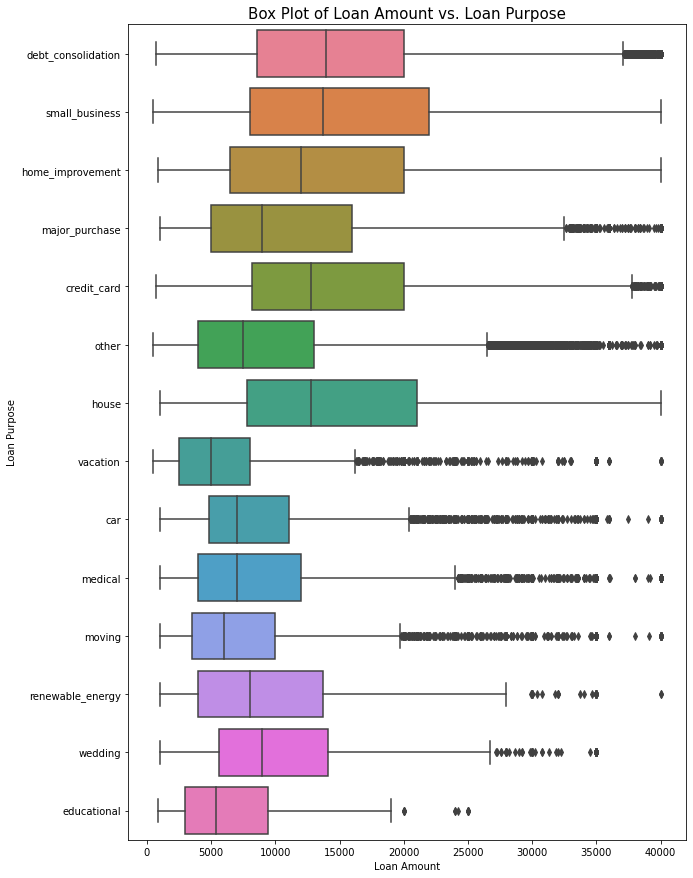

In [55]:
plt.figure(figsize=(10,15))
sns.boxplot(x="loan_amnt", y="purpose", data=combined_dataset, palette="husl")
plt.title('Box Plot of Loan Amount vs. Loan Purpose', fontsize=15)
plt.xlabel('Loan Amount', fontsize=10)
plt.ylabel('Loan Purpose', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
